In [1]:
# import Pandas
import pandas as pd

# import os
import os

# import numpy
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

In [2]:

final_df = pd.read_csv(os.path.join("../stats/final_combine_player_data.csv"))
final_df.head()

,Year,Name,Age,PER,GS,GP,TS%,FTr,OWS,DWS,...,player_height,player_weight,Salary Cap,Injury_DTD,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%
0,2010,Aaron Brooks,25.0,16.00,82.0,82.0,0.549,0.2240,3.900,1.600,...,182.88,73.028312,57700000,0.0,0.0,0.0,0.0,0.0,0.0,3.495133
1,2010,Acie Law,25.0,15.05,0.5,13.0,0.584,0.6905,0.175,0.075,...,190.50,91.625584,57700000,0.0,0.0,0.0,0.0,0.0,0.0,1.097492
2,2010,Al Harrington,29.0,16.80,15.0,72.0,0.546,0.3080,2.200,1.300,...,205.74,113.398000,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.991334
3,2010,Al Horford,23.0,19.40,81.0,81.0,0.594,0.3190,6.900,3.900,...,208.28,111.130040,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.436494
4,2010,Al Jefferson,25.0,19.00,76.0,76.0,0.524,0.2360,2.300,2.300,...,208.28,127.005760,57700000,0.0,0.0,0.0,0.0,0.0,0.0,22.530329


[]

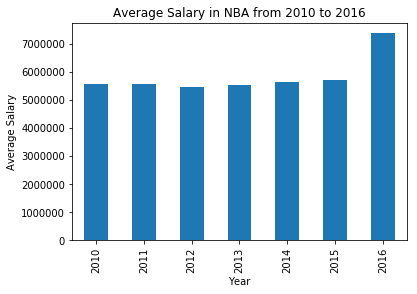

In [3]:
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=final_df.groupby('Year')['Salary'].mean()
var=sal.plot.bar(x='Year', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 2010 to 2016")
var.plot()

[]

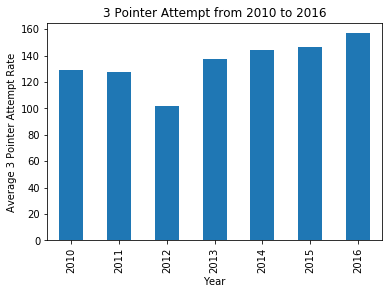

In [4]:

#Plot showing how 3 Point Attempt has changed over time
threePM=final_df.groupby('Year')['3PA'].mean()
graph=threePM.plot.bar()
graph.set_ylabel('Average 3 Pointer Attempt Rate')
graph.set_title('3 Pointer Attempt from 2010 to 2016')
graph.plot() 

Text(0.5,1,'True Shooting % from 2010 to 2016')

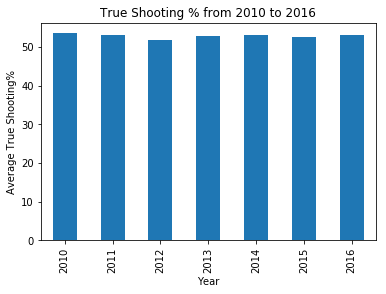

In [5]:
#More data exploration, looking at how an advanced metric, True Shooting %, has changed over time
ts=final_df.groupby('Year')['TS%'].mean()
ts=ts*100
graph=ts.plot.bar()
graph.set_ylabel('Average True Shooting%')
graph.set_title('True Shooting % from 2010 to 2016')

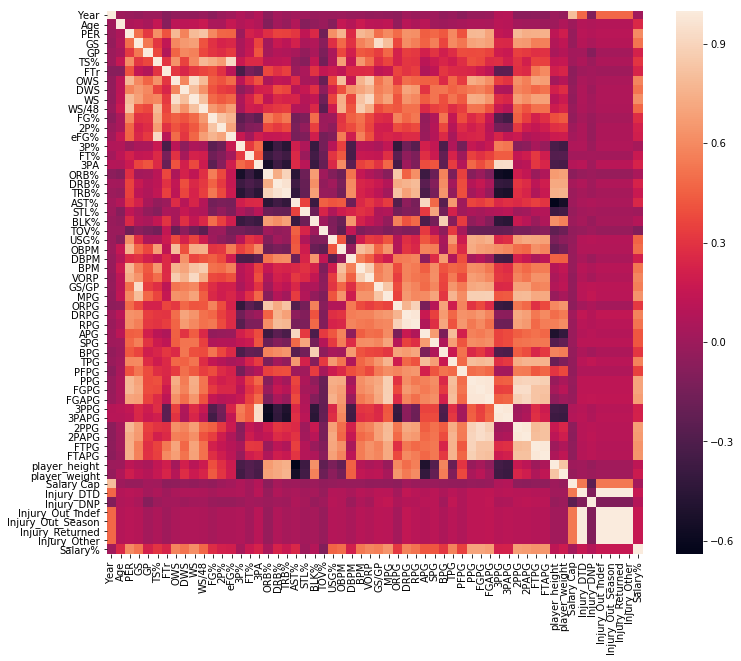

In [6]:
#remove salary in heatmap, store in separate variable
salary=final_df['Salary']
stats=final_df.drop('Salary', axis=1)


#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

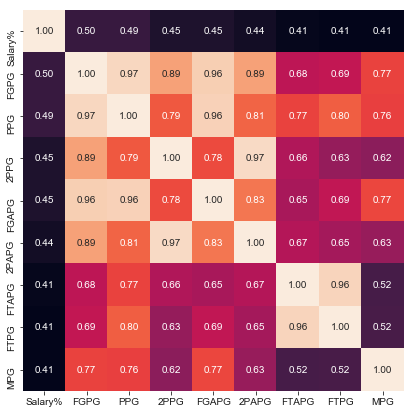

In [7]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with Salary% for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'Salary%')['Salary%'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)

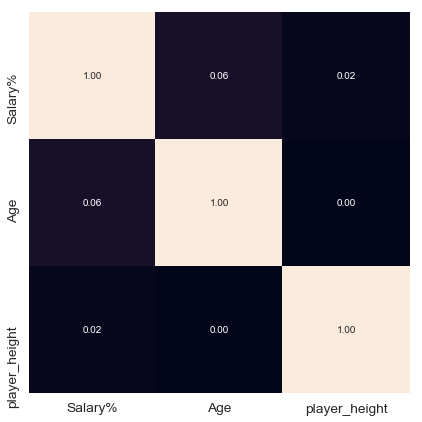

In [8]:
#splitting stats into 4 categories for later on, when looking at which group of stats is the best predictor of salary
physical=['Salary%', 'Age', 'player_height']
performance_regular=['Salary%','SPG','PPG','RPG','APG','BPG','TPG','FG%','FT%','PFPG']
performance_advanced=['Salary%','PER','USG%','WS','eFG%']
injuries=['Salary%','Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']

physical_stats=stats[physical]
performance_regular_stats=stats[performance_regular]
performance_advanced_stats=stats[performance_advanced]
injury_stats=stats[injuries]


#physical only has 2
heatMap(physical_stats,3 )

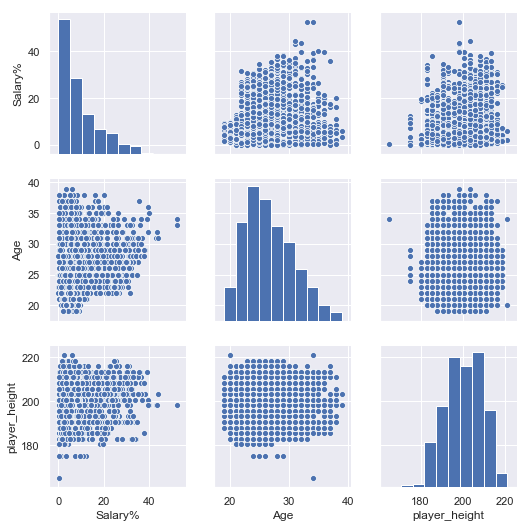

In [9]:

#creating scatter plots to further look at the relationships between Salary% and physical characteristics
sns.set()
sns.pairplot(physical_stats, height=2.5)
plt.show()

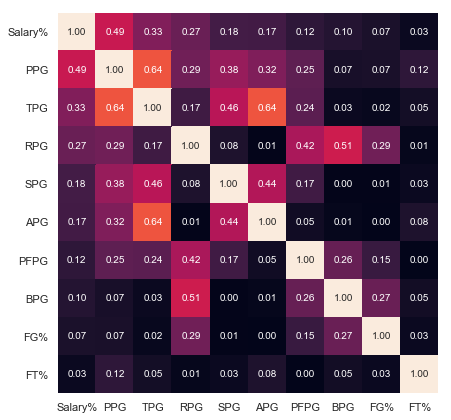

In [10]:
heatMap(performance_regular_stats, 10)

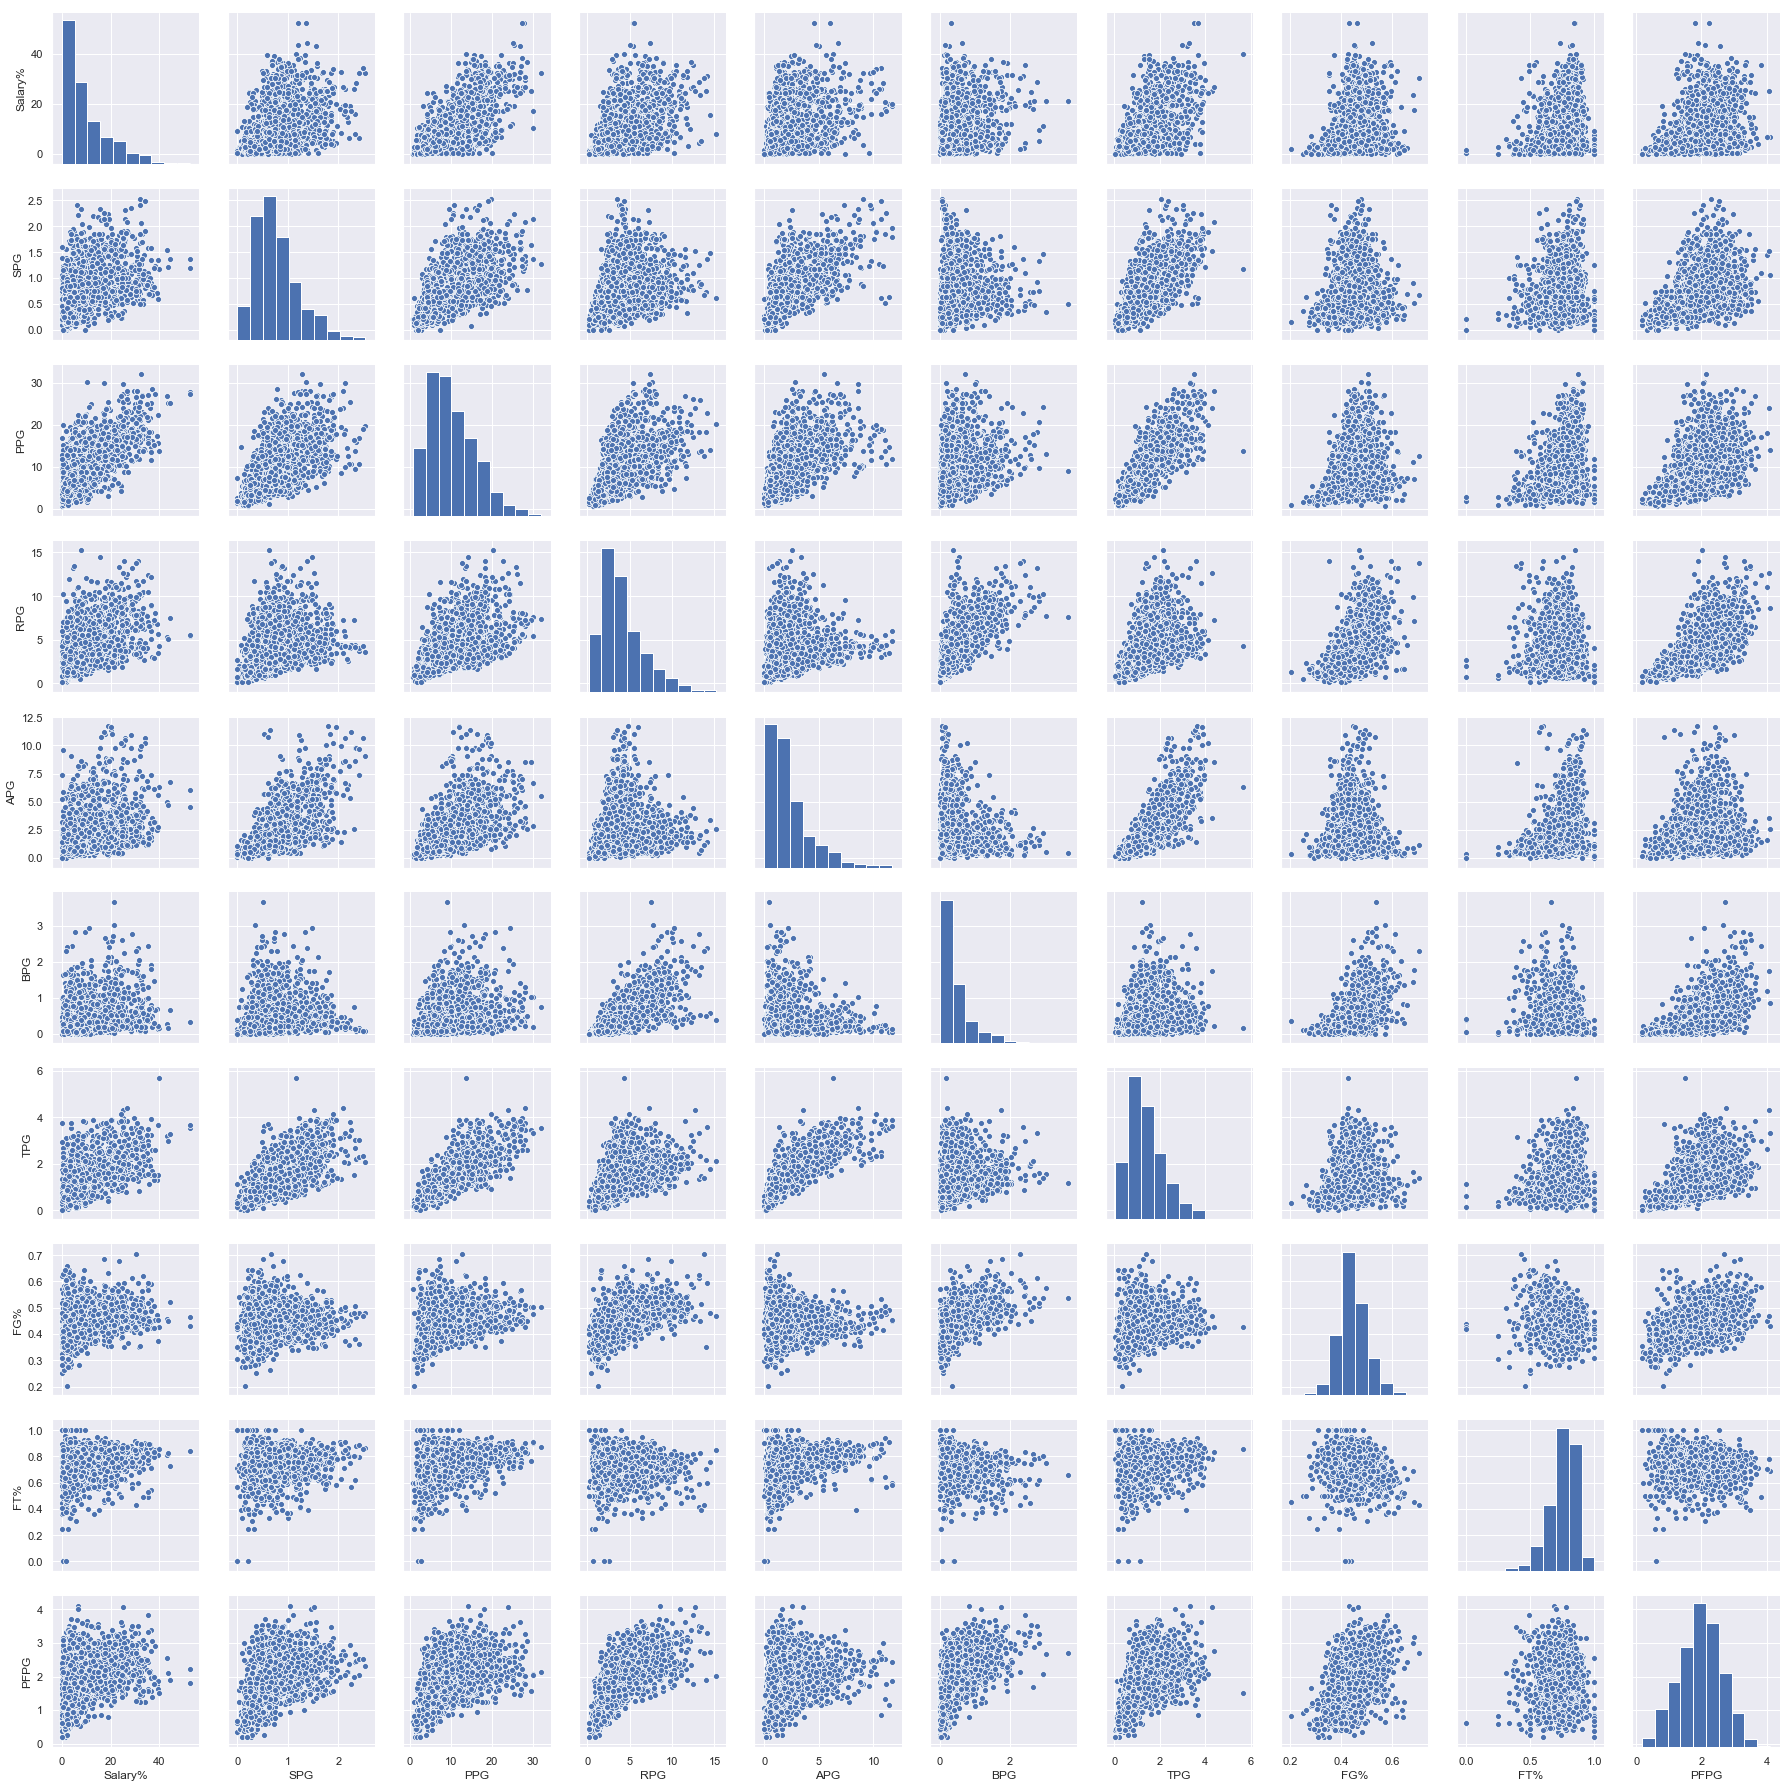

In [11]:
#creating scatter plots to further look at the relationships between Salary% and regular performances
reg=['Salary%','SPG','PPG','RPG','APG','BPG','TPG','FG%','FT%','PFPG']
sns.set()
sns.pairplot(performance_regular_stats[reg], height=2.5)
plt.show()

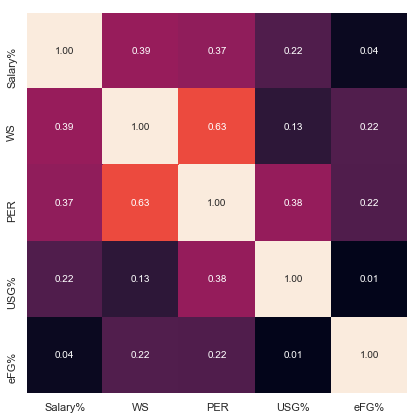

In [12]:
heatMap(performance_advanced_stats, 5)

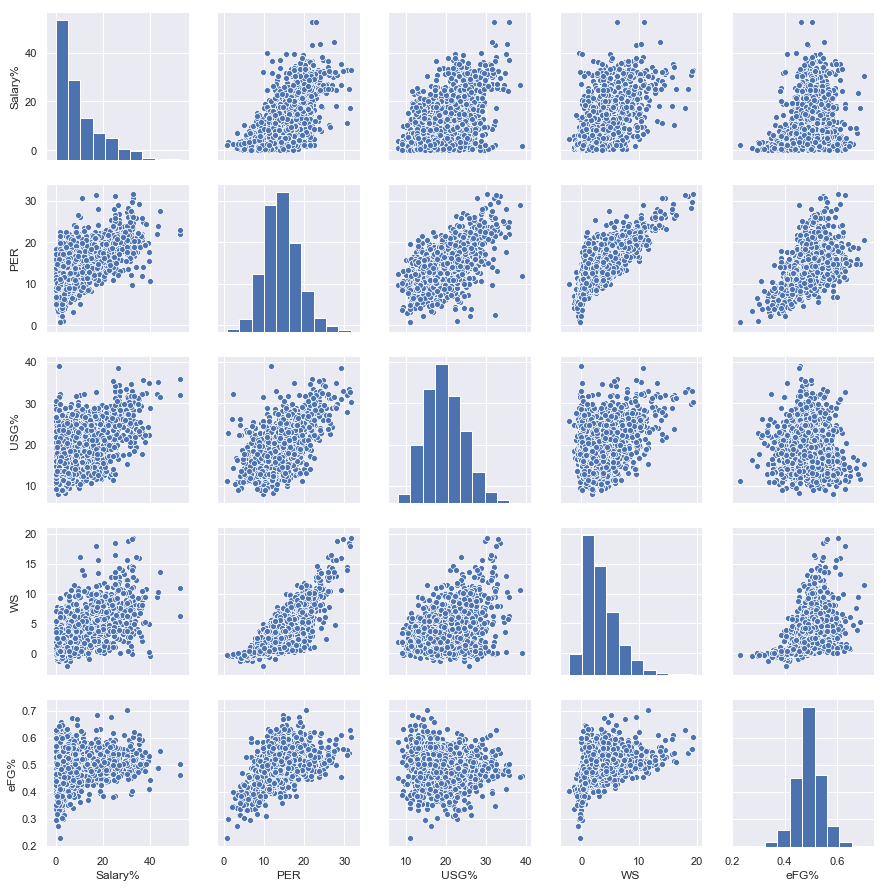

In [13]:
adv=['Salary%', 'PER','USG%','WS','eFG%']
sns.set()
sns.pairplot(performance_advanced_stats[adv], height=2.5)
plt.show()

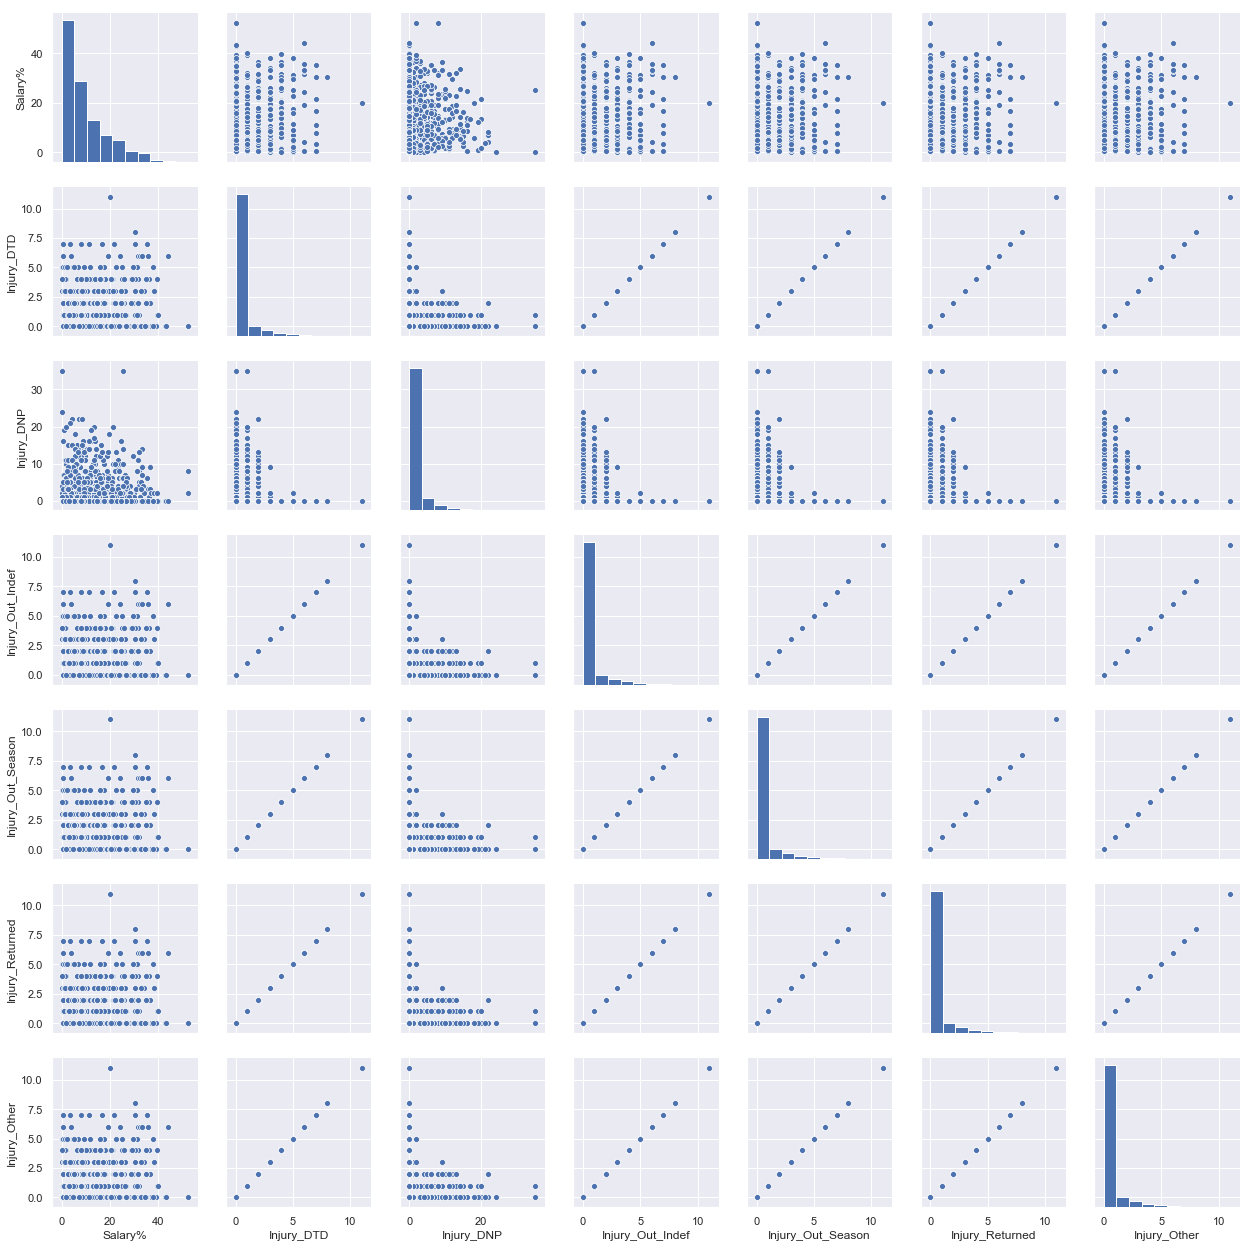

In [14]:
#creating scatter plots to further look at the relationships between Salary% and injuries
sns.set()
sns.pairplot(injury_stats, height=2.5)
plt.show()

In [15]:
#see if any variables are multicollinear, if so they can be removed
x = performance_advanced_stats[['PER','USG%','WS','eFG%']]
phyDF=physical_stats[['Age','player_height']]
z=performance_regular_stats[['SPG','PPG','RPG','APG','BPG','TPG','FG%','FT%','PFPG']]
inDF=injury_stats[['Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
    
#lower VIF factor values means less multicollinearity

,VIF Factor,features
0,56.3,PER
1,26.1,USG%
2,6.4,WS
3,20.2,eFG%


In [16]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(phyDF.values, i) for i in range(phyDF.shape[1])]
vif["features"] = phyDF.columns
vif.round(1)

# player_height and player_weight are a little bit high

,VIF Factor,features
0,38.5,Age
1,38.5,player_height


In [17]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif["features"] = z.columns
vif.round(1)


,VIF Factor,features
0,9.5,SPG
1,16.5,PPG
2,13.0,RPG
3,9.9,APG
4,4.6,BPG
5,26.8,TPG
6,40.7,FG%
7,34.6,FT%
8,20.5,PFPG


In [18]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(inDF.values, i) for i in range(inDF.shape[1])]
vif["features"] = inDF.columns
vif.round(1)

/Users/Guobao/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,Injury_DTD
1,1.0,Injury_DNP
2,inf,Injury_Out_Indef
3,inf,Injury_Out_Season
4,inf,Injury_Returned
5,inf,Injury_Other


In [19]:
inDF=injury_stats[['Injury_DNP']]

Root Mean Squared Error is : 8.545918639622249
R sq is : 0.07661572352380164


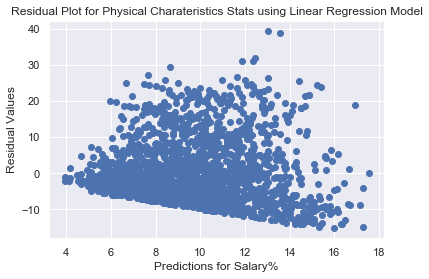

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=stats[['Salary%']]

#PHYSICAL STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(phyDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, phyDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Physical Charateristics Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 8.869864387232548
R sq is : 0.005284404282202448


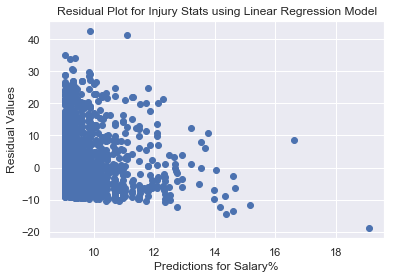

In [21]:
#INJURY STATS
x_train, x_test, y_train, y_test=train_test_split(inDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, inDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Injury Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.581283985229455
R sq is : 0.4523712630890314


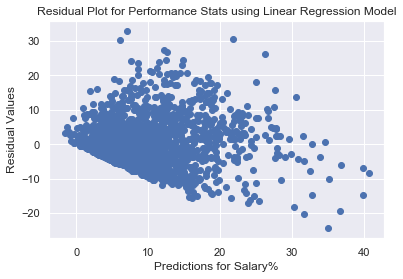

In [23]:
#advanced PERFORMANCE STATS
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, x, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Performance Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.0549347607679085
R sq is : 0.5364635358081378


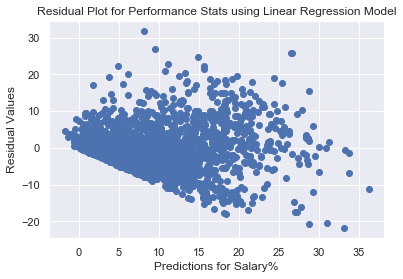

In [25]:
#regular PERFORMANCE STATS
x_train, x_test, y_train, y_test=train_test_split(z, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, z, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Performance Stats using Linear Regression Model')
plt.show()

In [26]:
#regular Performance Stats had the highest R squared and lowest RMSE values, so that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
stats['Predicted Salary%']=predict
stats['Residuals']=residuals
stats['Resid %']=(stats['Residuals']/stats['PER']*100)

In [39]:
copy=stats
copy=copy[['Year', 'Name', 'Age','Salary%','PER','USG%','Predicted Salary%', 'Residuals']]
copy=copy.sort_values('Residuals')
#get top25 most undervalued players
top25=copy[:25]
top25.to_csv('dataset for Tableau/undervalued_1.csv',index=False)
top25

,Year,Name,Age,Salary%,PER,USG%,Predicted Salary%,Residuals
1374,2015,Anthony Davis,21.0,11.211813,30.8,27.8,33.118208,-21.906395
426,2011,Kevin Love,22.0,7.941736,24.3,22.9,28.753558,-20.811823
149,2010,Kevin Durant,21.0,10.491617,26.2,32.0,31.020550,-20.528933
264,2010,Troy Murphy,29.0,0.374541,18.0,18.8,18.402444,-18.027903
1631,2015,Ty Lawson,27.0,0.335755,18.5,20.6,18.201426,-17.865671
1096,2014,Anthony Davis,20.0,9.555787,26.5,25.2,27.074277,-17.518490
304,2011,Blake Griffin,21.0,9.873682,21.9,27.3,27.220844,-17.347162
36,2010,Brook Lopez,21.0,4.182530,20.1,23.6,21.171528,-16.988998
1510,2015,Kevin Martin,31.0,0.318085,16.7,26.6,16.886172,-16.568088
1574,2015,Pau Gasol,34.0,11.811242,22.7,24.7,27.799622,-15.988380


In [40]:
ageMean=top25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=top25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

perMean=top25['PER'].mean()
print ('Average PER is:',perMean)

usgMean=top25['USG%'].mean()
print ('Average USG% is:',perMean)


residMean=top25['Residuals'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')

Average age is: 24.2
Average Salary% is: 5.115015607444754
Average PER is: 19.992000000000004
Average USG% is: 19.992000000000004
Average absolute value Residual is: 16.075614438632478 %


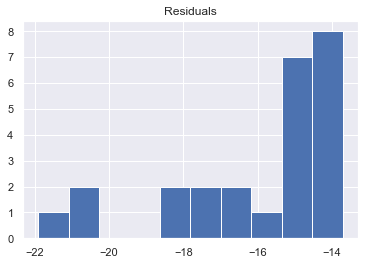

In [41]:
hist=top25.hist(column='Residuals')

In [43]:

#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25.to_csv('dataset for Tableau/overvalued_1.csv',index=False)
bottom25


,Year,Name,Age,Salary%,PER,USG%,Predicted Salary%,Residuals
554,2012,Amar'e Stoudemire,29.0,34.368408,17.700000,25.400000,16.900045,17.468363
13,2010,Andrei Kirilenko,28.0,30.889081,18.200000,17.700000,13.383444,17.505638
155,2010,Kobe Bryant,31.0,42.991768,21.900000,32.300000,25.353858,17.637910
1515,2015,Kobe Bryant,36.0,39.641640,17.600000,34.900000,21.683659,17.957981
1688,2016,Chandler Parsons,27.0,31.595357,16.200000,20.500000,13.517280,18.078077
1433,2015,Dwight Howard,29.0,35.454474,19.200000,23.300000,17.307706,18.146768
425,2011,Kevin Garnett,34.0,36.605065,20.600000,22.300000,18.224445,18.380620
1122,2014,Chris Bosh,29.0,35.181922,19.000000,22.600000,16.389648,18.792274
1648,2016,Al Horford,29.0,37.914429,19.400000,20.600000,19.106654,18.807774
430,2011,Kobe Bryant,32.0,43.491994,23.900000,35.100000,24.446870,19.045124


In [44]:
ageMean=bottom25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=bottom25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

perMean=bottom25['PER'].mean()
print ('Average PER is:',perMean)

usgMean=bottom25['USG%'].mean()
print ('Average USG% is:',perMean)

residMean=bottom25['Residuals'].mean()
print ('Average Residual is:',residMean, '%')

Average age is: 30.08
Average Salary% is: 36.44408586540672
Average PER is: 16.869333333333334
Average USG% is: 16.869333333333334
Average Residual is: 21.008251281352344 %


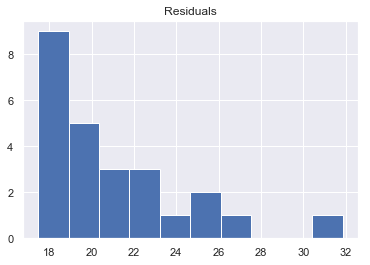

In [45]:
graph=bottom25.hist(column='Residuals')

In [48]:
#trying a different method, because raw residual values tends to discriminate against superstars who are being paid a lot of money

copy2=stats
copy2=copy2[['Year', 'Name', 'Age','Salary%','PER','USG%','Predicted Salary%', 'Resid %']]
copy2=copy2.sort_values('Resid %')
top25B=copy2[:25]
top25B.to_csv('dataset for Tableau/undervalued_2.csv',index=False)
top25B

,Year,Name,Age,Salary%,PER,USG%,Predicted Salary%,Resid %
1487,2015,Joe Johnson,33.0,0.415276,14.1,20.3,15.706540,-108.448680
216,2010,Rasual Butler,30.0,0.365830,10.7,17.0,11.364953,-102.795541
1218,2014,Josh Smith,28.0,3.539597,14.1,24.5,17.936657,-102.106811
264,2010,Troy Murphy,29.0,0.374541,18.0,18.8,18.402444,-100.155018
1510,2015,Kevin Martin,31.0,0.318085,16.7,26.6,16.886172,-99.210105
519,2011,Stephen Jackson,32.0,1.825770,14.6,27.4,16.175141,-98.283365
1631,2015,Ty Lawson,27.0,0.335755,18.5,20.6,18.201426,-96.571195
845,2013,Chandler Parsons,24.0,1.596203,15.3,18.3,16.202552,-95.466333
1764,2016,Jarrett Jack,32.0,0.082389,14.5,21.7,13.698980,-93.907528
1626,2015,Tony Wroten,21.0,0.265450,14.9,30.5,14.063279,-92.602881


In [49]:
bottom25B=copy2[-25:]
bottom25B.to_csv('dataset for Tableau/overvalued_2.csv',index=False)
bottom25B

,Year,Name,Age,Salary%,PER,USG%,Predicted Salary%,Resid %
799,2012,Tyrus Thomas,25.0,13.782648,9.000000,19.000000,3.284961,116.640965
465,2011,Mehmet Okur,31.0,18.761629,12.600000,21.200000,4.051615,116.746145
1747,2016,Iman Shumpert,25.0,13.804174,8.400000,13.200000,3.917441,117.699207
696,2012,Kobe Bryant,33.0,52.466758,21.900000,35.700000,26.577884,118.214038
1911,2016,Timofey Mozgov,29.0,22.857143,14.600000,16.100000,5.515556,118.777989
1171,2014,Gerald Wallace,31.0,17.222269,10.000000,11.600000,4.339659,128.826100
952,2013,Kendrick Perkins,28.0,15.035899,8.200000,10.600000,4.258204,131.435296
299,2011,Avery Bradley,20.0,2.626421,2.200000,26.100000,-0.475739,141.007285
1932,2016,Wesley Matthews,29.0,24.494054,10.900000,17.200000,9.091704,141.305967
199,2010,Nick Collison,29.0,22.998267,13.100000,12.100000,3.795290,146.587608


In [37]:
ageMean=bottom25B['Age'].mean()
print ('Average age is:',ageMean)

percentMean=bottom25B['Salary%'].mean()
print ('Average Salary% is:',percentMean)

perMean=bottom25B['PER'].mean()
print ('Average PER is:',perMean)

usgMean=bottom25['USG%'].mean()
print ('Average USG% is:',perMean)

residMean=bottom25B['Resid %'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')

Average age is: 28.04
Average Salary% is: 22.110540658509514
Average PER is: 9.876
Average USG% is: 9.876
Average absolute value Residual is: -169.219512387258 %


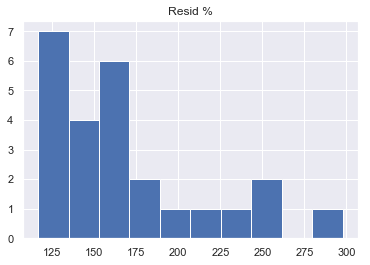

In [38]:
hisB=bottom25B.hist(column='Resid %')

### Resid % (copy2) is a better indicator of who is overvalued and undervalued